# IMAGE CLASSIFICATION USING MOBILENET

The objective of this notebook is to classify the histopathological images using MobileNet, which is a simple but efficient and not very computationally intensive convolutional neural networks. The dataset used for this classification model is the [LC25000 LUNG AND COLON HISTOPATHOLOGICAL IMAGE DATASET](https://github.com/tampapath/lung_colon_image_set). This dataset contains 25,000 histopathological images with 5 classes, each with 5,000 images, being:

1.   Lung benign tissue
2.   Lung adenocarcinoma
3.   Lung squamous cell carcinoma
4.   Colon adenocarcinoma
5.   Colon benign tissue

All images are 768 x 768 pixels in size and are in jpeg file format.


In [12]:
cd E:\COMPILER_PROGRAMS\SEM3\dataset\data

E:\COMPILER_PROGRAMS\SEM3\dataset\data


In [13]:
ls E:\COMPILER_PROGRAMS\SEM3\dataset\data

 Volume in drive E has no label.
 Volume Serial Number is 4EC3-F0C4

 Directory of E:\COMPILER_PROGRAMS\SEM3\dataset\data

09/18/2023  06:51 PM    <DIR>          .
09/18/2023  06:51 PM    <DIR>          ..
09/12/2023  02:03 PM    <DIR>          colon_aca
09/12/2023  02:03 PM    <DIR>          colon_n
09/12/2023  02:03 PM    <DIR>          lung_aca
09/12/2023  02:04 PM    <DIR>          lung_n
09/12/2023  02:04 PM    <DIR>          lung_scc
               0 File(s)              0 bytes
               7 Dir(s)  311,572,893,696 bytes free


## Loading dataset
Loading Dataset directly from the dirctory and then create a tf.data.Dataset for training and validation using the tf.keras.utils.image_dataset_from_directory utility.

In [14]:
import tensorflow as tf

data_dir = 'E:\COMPILER_PROGRAMS\SEM3\dataset\data'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels = "inferred",
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(224,224),
  batch_size=32)


Found 25000 files belonging to 5 classes.
Using 17500 files for training.


In [15]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels = "inferred",
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(224,224),
  batch_size=32)


Found 25000 files belonging to 5 classes.
Using 7500 files for validation.


## Plotting Sample Data

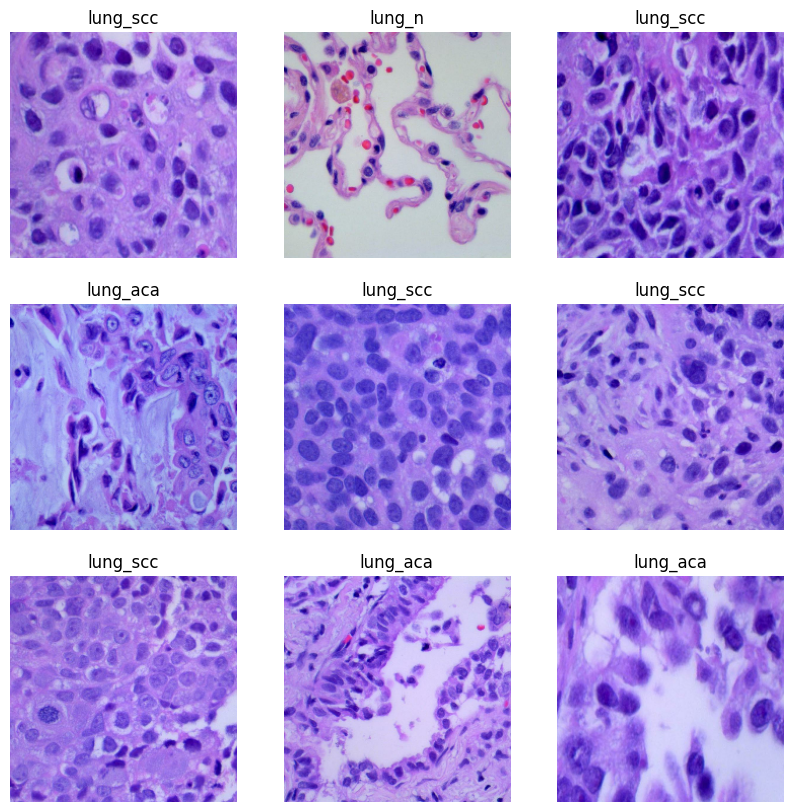

In [16]:
import matplotlib.pyplot as plt
import numpy 

class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

To create a test dataset, move 50% data from the validation set

In [17]:
val_batches = tf.data.experimental.cardinality(val_ds)
test_ds = val_ds.take(val_batches // 2)
val_ds = val_ds.skip(val_batches // 2)

In [18]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(val_ds))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_ds))

Number of validation batches: 118
Number of test batches: 117


## MobileNet Model Architecture

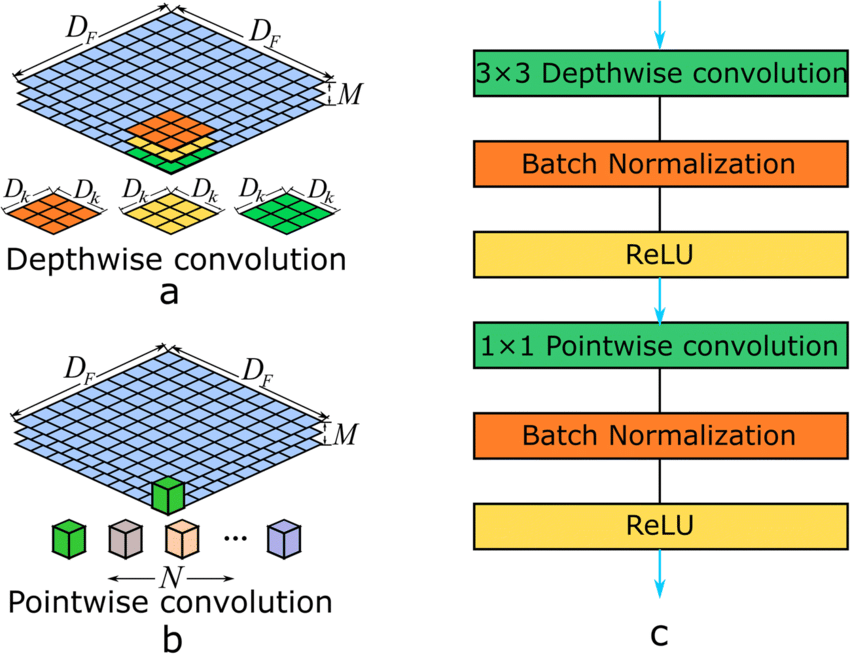
Neural Network Architecture of MobileNet. a Depthwise Convolution layer. b Pointwise Convolution layer. c Depthwise Separable convolutions with Depthwise and Pointwise layers followed by batchnorm and ReLU

In [19]:
import tensorflow as tf
from keras.models import Sequential 
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


model = Sequential()
model.add(MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
model.add(Dense(5, activation='softmax'))
model.layers[0].trainable=False             
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 7, 7, 5)           5125      
                                                                 
Total params: 3233989 (12.34 MB)
Trainable params: 5125 (20.02 KB)
Non-trainable params: 3228864 (12.32 MB)
_________________________________________________________________


### Compile the model

In [25]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

### Fit the model

In [26]:
model.fit(train_ds, epochs = 5,validation_data=val_ds)

Epoch 1/5


ValueError: in user code:

    File "C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py", line 5560, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None,) and (None, 7, 7, 5) are incompatible
